# FoodieX Analysis


## Import Libraries and Dataset

In [66]:
# !pip install numpy
# !pip install pandas
# !pip3 install matplotlib
# !pip install seaborn
# !pip install sklearn

In [67]:
# Import the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn import metrics 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [68]:
# Import the dataset
df = pd.read_csv('2020-XTern-DS.csv')

In [69]:
# see the first 5 rows in the dataset
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [70]:
# number of rows in the dataset
print("Number of Entries = ", len(df))

Number of Entries =  2019


## Data Cleaning

We see that there are 2 string Ratings: "NEW" and "Opening Soon". For our scoring method, we will not consider rows that have the Rating as "NEW" or "Opening Soon". So we will remove those from the dataset for all other parts too for consistency.

In [71]:
# Replace new, opening soon, and - ratings / votes with 0
df['Rating'] = df['Rating'].str.replace("NEW","0").str.replace("Opening Soon", "0").str.replace("-","0")
df['Votes'] = df['Votes'].str.replace("NEW","0").str.replace("-","0")
df['Reviews'] = df['Reviews'].str.replace("-","0")

Convert data types to proper format

In [72]:
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [73]:
df.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost      object
Minimum_Order     object
Rating            object
Votes             object
Reviews           object
Cook_Time         object
dtype: object

In [74]:
df['Average_Cost'] = df['Average_Cost'].str.replace("$","").str.replace(",",".").astype("float32")

In [75]:
df['Minimum_Order'] = df['Minimum_Order'].str.replace("$","").astype("float32")

In [76]:
df['Rating'] = df['Rating'].astype("float32")

In [77]:
df['Votes'] = df['Votes'].astype("int32")

In [78]:
df['Reviews'] = df['Reviews'].astype("int32")

In [79]:
df["Cook_Time"] = df['Cook_Time'].str.replace("minutes","").str.strip()

In [80]:
# new updated datatypes
df.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost     float32
Minimum_Order    float32
Rating           float32
Votes              int32
Reviews            int32
Cook_Time         object
dtype: object

Clean the cuisines list

In [81]:
li = df['Cuisines'].str.split(",").tolist()
strip_li = []

for x in li:
  strip_li.append(list(map(str.strip,x)))

df['Cuisines'] = strip_li
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"[Fast Food, Rolls, Burger, Salad, Wraps]",20.0,50.0,3.5,12,4,30
1,ID_2882,39.775933,-85.740581,"[Ice Cream, Desserts]",10.0,50.0,3.5,11,4,30
2,ID_1595,39.253436,-85.123779,"[Italian, Street Food, Fast Food]",15.0,50.0,3.6,99,30,65
3,ID_5929,39.029841,-85.332050,"[Mughlai, North Indian, Chinese]",25.0,99.0,3.7,176,95,30
4,ID_6123,39.882284,-85.517407,"[Cafe, Beverages]",20.0,99.0,3.2,521,235,65


## Conclusion 1
### Find the Trending Restaurents based on their Rating and number of **Votes**. For simplicity I will display the Top 10 Trending Restaurents.

### Sort Data wrt Rating and Votes

In [82]:
# sort the dataset based on the Rating and Votes
# the data is sorted with both Rating and Votes in descending order
con1_df = df
con1_df = con1_df.sort_values(["Rating", "Votes"], ascending = (False, False))

#### Top 10 Most Trending Restaurents based in Rating and Votes

In [83]:
# extract the 3 relevant columns that shows the Top 10 Restaurents 
con1_df = con1_df[['Restaurant' ,'Rating', 'Votes']]
con1_df = con1_df[:10]

In [84]:
con1_df

,Restaurant,Rating,Votes
1325,ID_4728,4.8,650
169,ID_7412,4.8,326
1180,ID_1064,4.7,9054
1428,ID_2051,4.7,3975
1501,ID_7924,4.7,1112
35,ID_1160,4.7,914
325,ID_383,4.7,707
144,ID_6537,4.7,706
225,ID_6278,4.7,441
1803,ID_2201,4.7,129


## Conclusion 2
### Find out the relationship between Reviews and Minimum Order! If for lower Minimum Order Price, the Reviews are high, then people prefer to order from low cost restaurents.

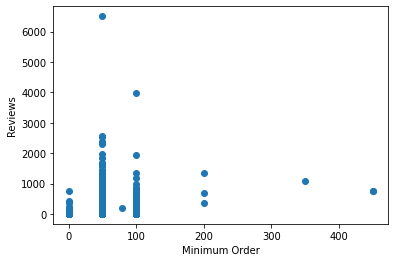

In [85]:
plt.scatter(df['Minimum_Order'], df['Reviews'])
plt.xlabel('Minimum Order')
_ =plt.ylabel('Reviews')

## Conclusion 3
### Figuring the Optimized FoodieX pick up zones. We will use the latitude and longitude columns in this part. We will plot them and then run K-Means Clustering Algorithm from the sklearn library.

In [86]:
con2_df = df

### Visualize and Prepare the Data for K-Means

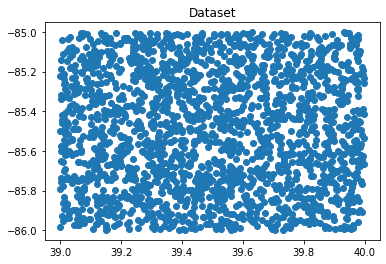

In [87]:
x1 = np.array(con2_df['Latitude']) # create a new variable to store all the latitudes
x2 = np.array(con2_df['Longitude']) # create a new variable to store all the longitudes
X = np.array(list(zip(x1,x2))) # join the 2 arrays to make a lists of lists and keep them in together

# plot a scatter plot to show all the points
plt.plot() 
plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 

### Elbow Method
#### Apply the Elbow Method to find the optimal value of k. k is the number of cluster. We use elbow method becauase our data does not have easily identifyable clusters, as seen in the scatter plot above.

In [88]:
# we compute the distortion and inertia of of our KMeans model. 
# The distortion computes the sum of squared distances from each point to its assigned center.
# Inertia is the sum of squared distances of samples to their closest cluster center.
# we will provide a range for the value of k and compute the distortion and inertia for each k.

K = range(1,30) 
dis = [] # distortions
iner = [] # inertia
mapping1 = {} 
mapping2 = {} 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    dis.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    iner.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


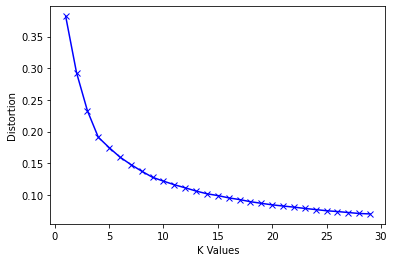

In [89]:
# plot the distortion values against the k
plt.plot(K, dis, 'bx-') 
plt.xlabel('K Values') 
plt.ylabel('Distortion')  
plt.show() 

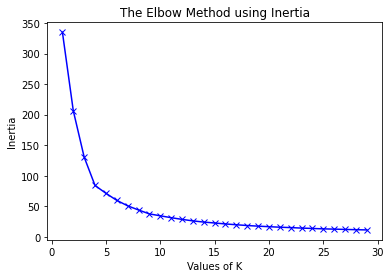

In [90]:
# plot the inertia values against the k
plt.plot(K, iner, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [91]:
# the optimal value of k, as seen from the graph, is 20.
# perform KMeans algorithm and fit it on the data (latitude and longitude)

kmeans = KMeans(n_clusters=20, random_state=0).fit(X)

# print(kmeans.cluster_centers_)

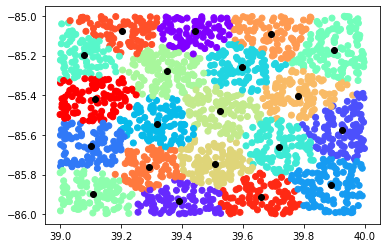

In [92]:
# plot the cluster on a scatter plot. Also plot the centers of each cluster on the graph

plt.scatter(x1,x2, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [93]:
# predict a location
predicted = kmeans.predict([[39.31, -85.74]])
for label in predicted:
  print("The predicted cluster is: ", label)

The predicted cluster is:  16


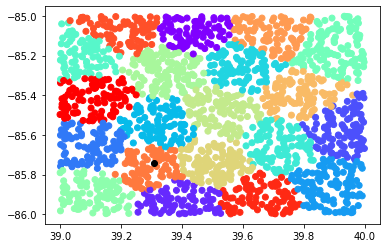

In [94]:
# plot the point on the plot
plt.scatter(x1,x2, c=kmeans.labels_, cmap='rainbow')
plt.scatter(39.31, -85.74, color='black')

## Conclusion 4

Now, we will create a one-hot vector for each cuisine category for Machine learning.
Our model will predict cook time based on the cuisines

In [95]:
X = df['Cuisines'].str.join('|').str.get_dummies()
Y = df['Cook_Time']
con3_df = df[['Restaurant','Cook_Time']].join(df['Cuisines'].str.join('|').str.get_dummies())
con3_df.head()

,Restaurant,Cook_Time,Afghan,American,Andhra,Arabian,Asian,Assamese,Awadhi,BBQ,...,Sri Lankan,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Vietnamese,Wraps
0,ID_6321,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ID_2882,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ID_1595,65,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,ID_5929,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ID_6123,65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


https://scikit-learn.org/stable/modules/multiclass.html

Split the dataset into 80% training and 20% test sets

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.80)
print("X_train = {} , X_test = {}".format(X_train.shape,X_test.shape))
print("y_train = {} , y_test = {}".format(y_train.shape,y_test.shape))

X_train = (1615, 89) , X_test = (404, 89)
y_train = (1615,) , y_test = (404,)


In [97]:
# using the RandomForestClassifier because it gives the best accuracy as compared to other classifiers.
clf = RandomForestClassifier(criterion="entropy")
clf.fit(X_train, y_train)
print("The accuracy of predicting Cook Time using Cuisines is : ",clf.score(X_test,y_test)*100)

The accuracy of predicting Cook Time using Cuisines is :  64.85148514851485


**Note: The small size of the dataset it probably what caused a lower accuracy score**
